In [1]:
input('Warning: contains solution spoilers. Press enter to continue.')
import numpy as np
import matplotlib.pyplot as plt

# Problem set 1 (2024 version)
## Problem 1
Part a

Pseudocode:

Input: 
 - function: fn
 - min guess: xmin
 - max guess: xmax

Code:
 - Loop:
    - midpoint <- (xmin + xmax) / 2
    - if fn(midpoint) = 0:
        - return **midpoint**
    - elif fn(midpoint) > 0:
        - xmax <- midpoint
    - else:
        - xmin <- midpoint

In [2]:
def root_bisection(fn, xmin, xmax, tol=1e-14, nits=500):
    '''I don't feel like writing docstrings'''
    # sanitise
    if not callable(fn):
        raise ValueError('fn must be a callable function')
    if fn(xmin) * fn(xmax) >= 0:
        raise ValueError('fn(xmin) and fn(xmax) must have opposite signs')
    if fn(xmin) >= fn(xmax):
        xmin, xmax = xmax, xmin  # swap

    # main loop
    n = 0
    while n < nits:
        midpoint = (xmin + xmax) / 2
        f_mid = fn(midpoint)
        if np.abs(f_mid) < tol:
            break
        elif f_mid > 0:
            xmax = midpoint
        else:
            xmin = midpoint
        n += 1
    else:
        raise ValueError(f'Root not found in {nits} iterations. Current midpoint: {midpoint}.')
    print(f'Root found at {midpoint} in {n} iterations, with residual {f_mid:.3e}.')
    
    

In [3]:
fn = lambda x: x**2 + 5*x - 6
root_bisection(fn, -1.5, 6, 1e-14, 100)

Root found at 1.000000000000001 in 50 iterations, with residual 7.105e-15.


In [4]:
fn = lambda x: x/(1+np.exp(x)) + 1
root_bisection(fn, -2, 6, 1e-14, 100)

Root found at -1.2784645427610712 in 45 iterations, with residual 2.554e-15.


Part b

In [5]:
def root_newton(fn, fnderiv, x0, tolx=1e-10, tolf=1e-13, nits=100, ret=False):
    # main loop
    n = 0
    while n < nits:
        f = fn(x0)
        if np.abs(f) < tolf:
            break
        df = fnderiv(x0)
        if np.abs(df) < tolx:
            raise ValueError('Derivative too small')
        x0 -= f / df
        n += 1
    else:
        raise ValueError(f'Root not found in {nits} iterations. Current x0: {x0}.')
    if ret:
        return x0
    else:
        print(f'Root found at {x0} in {n} iterations, with residual {f:.3e}.')

In [6]:
fn = lambda x: x**2 + 5*x - 6
fnderiv = lambda x: 2*x + 5
root_newton(fn, fnderiv, -1.5, 1e-14, 1e-14, 100)

Root found at 1.0000000000000002 in 6 iterations, with residual 1.776e-15.


## Question 2

Part a,b,d

In [7]:
def forward_euler(dydt, y0, dt, tn):
    y_list = [y0]
    for t in np.arange(0, tn, dt):
        y = y_list[-1]
        y = y + dydt(y, t) * dt
        y_list.append(y)
    return y_list

In [8]:
def backward_euler(dydt, y0, dt, tn, ytol=1e-2):
    y_list = [y0]
    for t in np.arange(0, tn, dt):
        # This is the secant root finding method
        fn = lambda y: y - dydt(y, t) * dt - y_list[-1]
        # we can analytically differentiate here instead of a fd
        fn_deriv = lambda y: (fn(y+ytol) - fn(y)) / ytol
        y = root_newton(fn, fn_deriv, y_list[-1], ret=True)
        y_list.append(y)
    return y_list

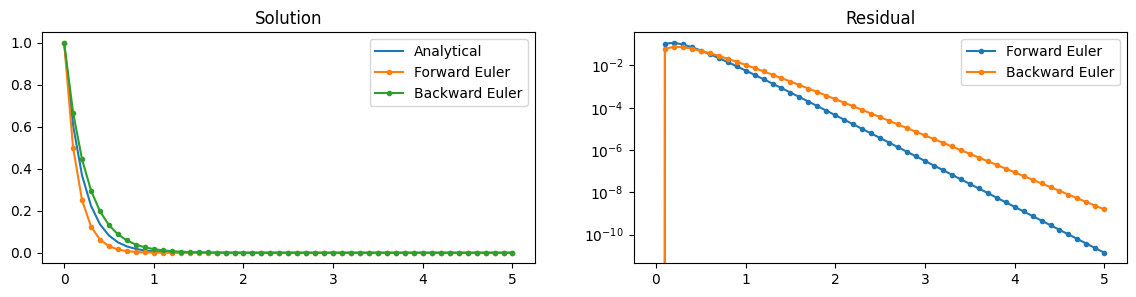

In [9]:
w = 5
ft = lambda t: 0
fn = lambda y, t: -w * y + ft(t)

y0 = 1
dt = .1
tn = 5
t = np.arange(0, tn+dt, dt)
sol = np.exp(-w*t)

def plot_euler(sol):
    fe = forward_euler(fn, y0, dt, tn)
    be = backward_euler(fn, y0, dt, tn)

    fig, ax = plt.subplots(1, 2, figsize=(14, 3))
    ax[0].set_title('Solution')
    ax[0].plot(t, sol, label='Analytical')
    ax[0].plot(t, fe, '.-', label='Forward Euler')
    ax[0].plot(t, be, '.-', label='Backward Euler')
    ax[0].legend()

    ax[1].set_title('Residual')
    ax[1].plot(t, np.abs(sol-fe), '.-', label='Forward Euler')
    ax[1].plot(t, np.abs(sol-be), '.-', label='Backward Euler')
    ax[1].set_yscale('log')
    ax[1].legend()
    plt.show()
    
plot_euler(sol)

A larger timestep makes FE unstable, but BE still works...

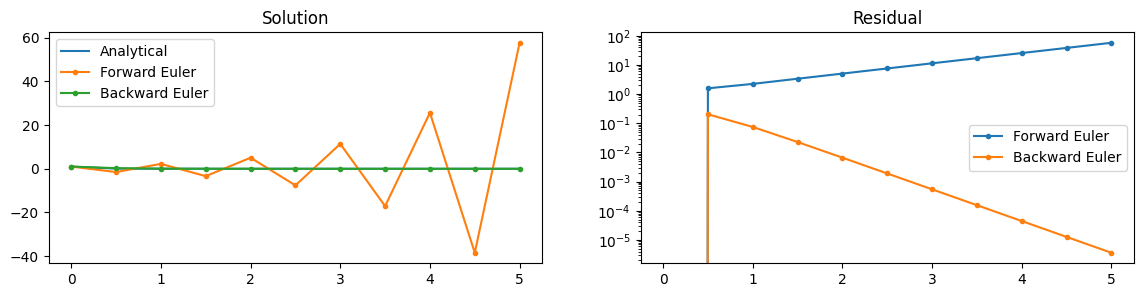

In [10]:
w = 5
ft = lambda t: 0
fn = lambda y, t: -w * y + ft(t)

y0 = 1
dt = .5
tn = 5
t = np.arange(0, tn+dt, dt)
sol = np.exp(-w*t)

plot_euler(sol)

Part f

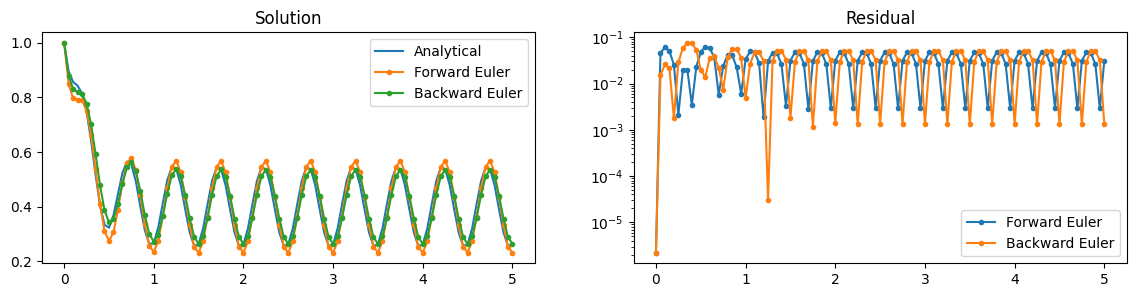

In [11]:
w = 5
ft = lambda t: 2 + 2 * np.sin(4*np.pi*t)
fn = lambda y, t: -w * y + ft(t)
sol = lambda t: 0.00109341 * 2.71828**(-5* t)* (365.827* 2.71828**(5 *t) + 50*2.71828**(5* t) *np.sin(12.5664* t) - 125.664* 2.71828**(5* t) *np.cos(12.5664 *t) + 674.405)  # WA

y0 = 1
dt = .05
tn = 5
t = np.arange(0, tn+dt, dt)
plot_euler(sol(t))

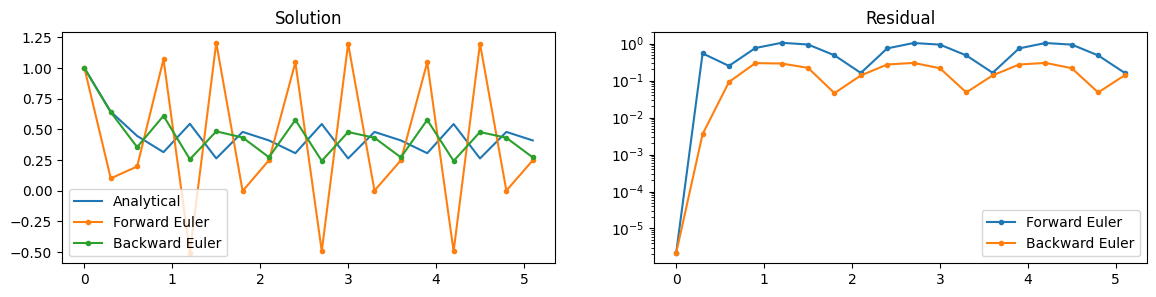

In [12]:
y0 = 1
dt = .3  # Too big for forcing period
tn = 5
t = np.arange(0, tn+dt, dt)
plot_euler(sol(t))

## Q3


In [13]:
sigma = 10.
beta =  8/3.
r = 28.

# Lorenz
def f_lorenz(ve):
    x, y, z = ve[0], ve[1], ve[2]
    return np.array([sigma*(y-x), r*x-y-x*z, x*y-beta*z])

# Jacobian of Lorenz
def J_lorenz(ve):
    x, y, z = ve[0], ve[1], ve[2]
    J = np.array([[-sigma, sigma, 0.],
                 [r-z, -1., -x],
                 [y, x, -beta]]
                )
    return J

In [14]:
def root_newton_multi(fn, fnderiv, x0, tolx=1e-10, tolf=1e-13, nits=100, ret=False):
    # main loop
    n = 0
    while n < nits:
        f = fn(x0)
        # print(f)
        if all(np.abs(f) < tolf):
            break
        df = fnderiv(x0)
        if np.abs(np.linalg.det(df)) < tolx:
            raise ValueError('Derivative too small')
        x0 = x0 - np.linalg.solve(df, f)
        n += 1
    else:
        raise ValueError(f'Root not found in {nits} iterations. Current x0: {x0}.')
    if ret:
        return x0
    else:
        print(f'Root found at {x0} in {n} iterations, with residual {np.max(f):.3e}.')

In [15]:
root_newton_multi(f_lorenz, J_lorenz, np.array([3, 2, 1]), 1e-10, 1e-13, 100)
root_newton_multi(f_lorenz, J_lorenz, np.array([8, 8, 27]), 1e-10, 1e-13, 100)
root_newton_multi(f_lorenz, J_lorenz, np.array([-8, -8, 28]), 1e-10, 1e-13, 100)

Root found at [-8.27493287e-19 -8.27493287e-19 -6.05674879e-18] in 5 iterations, with residual 1.615e-17.
Root found at [ 8.48528137  8.48528137 27.        ] in 4 iterations, with residual 0.000e+00.
Root found at [-8.48528137 -8.48528137 27.        ] in 4 iterations, with residual 0.000e+00.


The three steady state solutions are $$\begin{align*}
&(0,0,0)\\ &(\sqrt{\beta(r-1)}, \sqrt{\beta(r-1)}, r-1) \\ &(-\sqrt{\beta(r-1)}, -\sqrt{\beta(r-1)}, r-1)
\end{align*}$$

In [16]:
x, y, z = -np.sqrt(beta*(r-1)), -np.sqrt(beta*(r-1)), r-1
f_lorenz([x,y,z])

array([ 0.00000000e+00,  0.00000000e+00, -1.42108547e-14])

Bonus: Lorenz attractor forward Euler

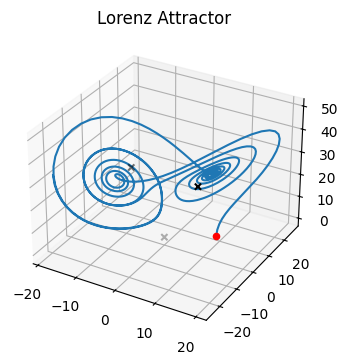

In [ ]:
x0 = np.array([12, 3, 5])
points = forward_euler(lambda x, t: f_lorenz(x), x0, .01, 10)

points = np.array(points)
x, y, z = points[:,0], points[:,1], points[:,2]

plt.ion()
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
ax.set_title('Lorenz Attractor')
plt.plot(x,y,z)
ax.scatter(x[0], y[0], z[0], c='r')
ax.scatter([0, np.sqrt(beta*(r-1)), -np.sqrt(beta*(r-1))], [0, 0, 0], [0, r-1, r-1], c='k', marker='x')
plt.show()